## Data Science Work Flow

Python -> R -> D3

In [14]:
# import the d3_module
import d3_example

# typical imports
# import requirments 
from IPython.display import Image
from IPython.display import display
from datetime import *
import json
from copy import *
from pprint import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import rpy2
%load_ext rpy2.ipython
%R require("ggplot2")
%matplotlib inline
from ggplot import *
randn = np.random.randn



The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


### Pandas

Quick use cases with Pandas:

- Cleaning data
- View vs Copy 
- Datetime conversion
- Datetime Binning

#### Cleaning data
Common tools that I use:
- Try using [DataFrame.dropna()](http://stackoverflow.com/questions/13413590/how-to-drop-rows-of-pandas-dataframe-whose-value-of-certain-column-is-nan#answer-13434501) to remove null values.
- The [pd.io.parsers.read_csv()](http://pandas.pydata.org/pandas-docs/dev/generated/pandas.io.parsers.read_csv.html) module has a `names` argument that allows you to pass a specific column header, `skiprows` argument that can take an index or number of rows, and a `parse_dates` attribute that can make string to date conversions simple.

In [25]:
sampleData = pd.io.parsers.read_csv(
    "../data/sampleData.csv",
    header=0
    #names=['timeStamp1','ts','counts']
    #,parse_dates=[0]
    )
sampleData = sampleData.dropna(subset=['timeStamp'])
sampleData.head()


,timeStamp,paleo_users,dtmonth,healthy_index,snack_food_index,paleo,gluten,donut,aquafina,soda,...,sobe,cheetos,pretzel,quinoa,kale,dairy,vegetables,gatorade,doritos,lipton
0,1/1/12 0:00,NaN,1/1/12,7771,13050,957,2188,3733,398,NaN,...,650,2393,2484,241,1116,2994,3269,6526,4440,249
1,1/2/12 0:00,NaN,1/1/12,10665,16472,1392,2560,5345,497,NaN,...,761,3710,3145,552,1484,4645,4677,5627,4272,456
2,1/3/12 0:00,NaN,1/1/12,14024,19617,1677,3629,5277,674,NaN,...,857,5095,2948,846,1782,5445,6090,5632,6297,983
3,1/4/12 0:00,NaN,1/1/12,12879,19294,1736,3600,5785,869,NaN,...,1248,4451,2930,906,1991,5541,4646,4799,6128,1112
4,1/5/12 0:00,NaN,1/1/12,13483,20582,1504,3578,5466,644,NaN,...,1246,4478,2996,1031,1994,6160,5376,5543,7642,744


####View vs Copy
An easy frustration with a [simple solution](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy).

The first example returns a __copy__ of `sampleData`. The original value remains unchanged.

In [26]:
sampleData.iloc[0]['healthy_index'] = 5555
sampleData.iloc[0]['timeStamp'] = "1/1/12 5:55"
sampleData.head()

/Users/blehman/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/blehman/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


,timeStamp,paleo_users,dtmonth,healthy_index,snack_food_index,paleo,gluten,donut,aquafina,soda,...,sobe,cheetos,pretzel,quinoa,kale,dairy,vegetables,gatorade,doritos,lipton
0,1/1/12 0:00,NaN,1/1/12,7771,13050,957,2188,3733,398,NaN,...,650,2393,2484,241,1116,2994,3269,6526,4440,249
1,1/2/12 0:00,NaN,1/1/12,10665,16472,1392,2560,5345,497,NaN,...,761,3710,3145,552,1484,4645,4677,5627,4272,456
2,1/3/12 0:00,NaN,1/1/12,14024,19617,1677,3629,5277,674,NaN,...,857,5095,2948,846,1782,5445,6090,5632,6297,983
3,1/4/12 0:00,NaN,1/1/12,12879,19294,1736,3600,5785,869,NaN,...,1248,4451,2930,906,1991,5541,4646,4799,6128,1112
4,1/5/12 0:00,NaN,1/1/12,13483,20582,1504,3578,5466,644,NaN,...,1246,4478,2996,1031,1994,6160,5376,5543,7642,744


The next example returns a __view__ of `sampleData`. The original value is changed.

In [27]:
sampleData.ix[0,'healthy_index'] =5555
sampleData.ix[0,'timeStamp'] = "1/1/12 5:55"
sampleData.head()

,timeStamp,paleo_users,dtmonth,healthy_index,snack_food_index,paleo,gluten,donut,aquafina,soda,...,sobe,cheetos,pretzel,quinoa,kale,dairy,vegetables,gatorade,doritos,lipton
0,1/1/12 5:55,NaN,1/1/12,5555,13050,957,2188,3733,398,NaN,...,650,2393,2484,241,1116,2994,3269,6526,4440,249
1,1/2/12 0:00,NaN,1/1/12,10665,16472,1392,2560,5345,497,NaN,...,761,3710,3145,552,1484,4645,4677,5627,4272,456
2,1/3/12 0:00,NaN,1/1/12,14024,19617,1677,3629,5277,674,NaN,...,857,5095,2948,846,1782,5445,6090,5632,6297,983
3,1/4/12 0:00,NaN,1/1/12,12879,19294,1736,3600,5785,869,NaN,...,1248,4451,2930,906,1991,5541,4646,4799,6128,1112
4,1/5/12 0:00,NaN,1/1/12,13483,20582,1504,3578,5466,644,NaN,...,1246,4478,2996,1031,1994,6160,5376,5543,7642,744


####Datetime Conversion
When `parse_dates` is not an option, we can apply a transformation using `strptime`, which can handle non-zero padded values.

In [28]:
sampleData.timeStamp = pd.to_datetime(
    sampleData['timeStamp'].apply(lambda x: 
        datetime.strptime(x,"%m/%d/%y %H:%M")),format = "%m/%d/%y %H:%M")

sampleData.head()

,timeStamp,paleo_users,dtmonth,healthy_index,snack_food_index,paleo,gluten,donut,aquafina,soda,...,sobe,cheetos,pretzel,quinoa,kale,dairy,vegetables,gatorade,doritos,lipton
0,2012-01-01 05:55:00,NaN,1/1/12,5555,13050,957,2188,3733,398,NaN,...,650,2393,2484,241,1116,2994,3269,6526,4440,249
1,2012-01-02 00:00:00,NaN,1/1/12,10665,16472,1392,2560,5345,497,NaN,...,761,3710,3145,552,1484,4645,4677,5627,4272,456
2,2012-01-03 00:00:00,NaN,1/1/12,14024,19617,1677,3629,5277,674,NaN,...,857,5095,2948,846,1782,5445,6090,5632,6297,983
3,2012-01-04 00:00:00,NaN,1/1/12,12879,19294,1736,3600,5785,869,NaN,...,1248,4451,2930,906,1991,5541,4646,4799,6128,1112
4,2012-01-05 00:00:00,NaN,1/1/12,13483,20582,1504,3578,5466,644,NaN,...,1246,4478,2996,1031,1994,6160,5376,5543,7642,744


####Datetime Binning
The datetime object has properties that make binning rather simple.

In [29]:
donut = sampleData.ix[:,("timeStamp","donut")]
donut.head()

,timeStamp,donut
0,2012-01-01 05:55:00,3733
1,2012-01-02 00:00:00,5345
2,2012-01-03 00:00:00,5277
3,2012-01-04 00:00:00,5785
4,2012-01-05 00:00:00,5466


Find selections from the datetime object to create new columns.

In [30]:
donut['Year'] = donut.timeStamp.dt.year
donut['Month'] = donut.timeStamp.dt.month
donut.head()

,timeStamp,donut,Year,Month
0,2012-01-01 05:55:00,3733,2012,1
1,2012-01-02 00:00:00,5345,2012,1
2,2012-01-03 00:00:00,5277,2012,1
3,2012-01-04 00:00:00,5785,2012,1
4,2012-01-05 00:00:00,5466,2012,1


--------->**Learn how to access grouby elements**

In [31]:
donut_groupby_yearmonth = donut.groupby(['Year','Month'],as_index = False).sum()
print donut_groupby_yearmonth.head()
donut_groupby_yearmonth1 = donut.groupby(['Year','Month']).sum()
print
print 
print donut_groupby_yearmonth1.head()
print 
print 
#print donut_groupby_yearmonth1

   Year  Month   donut
0  2012      1  174574
1  2012      2  194164
2  2012      3  206323
3  2012      4  205019
4  2012      5  248352


             donut
Year Month        
2012 1      174574
     2      194164
     3      206323
     4      205019
     5      248352




In [33]:
sampleData.ix['Year'] = sampleData.timeStamp.dt.year
sampleData.ix['Month'] = sampleData.timeStamp.dt.month
##Noice no 'Year' nor 'Month' in the dataset
sampleData.head()



,timeStamp,paleo_users,dtmonth,healthy_index,snack_food_index,paleo,gluten,donut,aquafina,soda,...,sobe,cheetos,pretzel,quinoa,kale,dairy,vegetables,gatorade,doritos,lipton
0,2012-01-01 05:55:00,NaN,1/1/12,5555,13050,957,2188,3733,398,NaN,...,650,2393,2484,241,1116,2994,3269,6526,4440,249
1,2012-01-02 00:00:00,NaN,1/1/12,10665,16472,1392,2560,5345,497,NaN,...,761,3710,3145,552,1484,4645,4677,5627,4272,456
2,2012-01-03 00:00:00,NaN,1/1/12,14024,19617,1677,3629,5277,674,NaN,...,857,5095,2948,846,1782,5445,6090,5632,6297,983
3,2012-01-04 00:00:00,NaN,1/1/12,12879,19294,1736,3600,5785,869,NaN,...,1248,4451,2930,906,1991,5541,4646,4799,6128,1112
4,2012-01-05 00:00:00,NaN,1/1/12,13483,20582,1504,3578,5466,644,NaN,...,1246,4478,2996,1031,1994,6160,5376,5543,7642,744


In [34]:
sampleData['Year'] = sampleData.timeStamp.dt.year
sampleData['Month'] = sampleData.timeStamp.dt.month
##Noice that we now have 'Year' nor 'Month' in the dataset
sampleData.head()

,timeStamp,paleo_users,dtmonth,healthy_index,snack_food_index,paleo,gluten,donut,aquafina,soda,...,pretzel,quinoa,kale,dairy,vegetables,gatorade,doritos,lipton,Year,Month
0,2012-01-01 05:55:00,NaN,1/1/12,5555,13050,957,2188,3733,398,NaN,...,2484,241,1116,2994,3269,6526,4440,249,2012,1
1,2012-01-02 00:00:00,NaN,1/1/12,10665,16472,1392,2560,5345,497,NaN,...,3145,552,1484,4645,4677,5627,4272,456,2012,1
2,2012-01-03 00:00:00,NaN,1/1/12,14024,19617,1677,3629,5277,674,NaN,...,2948,846,1782,5445,6090,5632,6297,983,2012,1
3,2012-01-04 00:00:00,NaN,1/1/12,12879,19294,1736,3600,5785,869,NaN,...,2930,906,1991,5541,4646,4799,6128,1112,2012,1
4,2012-01-05 00:00:00,NaN,1/1/12,13483,20582,1504,3578,5466,644,NaN,...,2996,1031,1994,6160,5376,5543,7642,744,2012,1


In [68]:
from IPython.display import display
x_sum = sampleData.groupby(['Year','Month']).sum()
#print x_sum.head()
#x_sum.index
print 
print display(x_sum.head())
print sampleData.columns



paleo_users  healthy_index  snack_food_index  paleo  gluten  \
Year Month                                                                
2012 1              NaN         377914            594703  42007  109002   
     2              NaN         365796            711195  42757  115237   
     3              NaN         409257            758513  44781  124889   
     4              NaN         492068            751396  45050  142111   
     5              NaN         480160            723097  45912  147278   

             donut  aquafina  soda  atkins_diet  pepsi   ...     sobe  \
Year Month                                               ...            
2012 1      174574     19974   NaN         3356    NaN   ...    29565   
     2      194164     18169   NaN         2896    NaN   ...    28023   
     3      206323     19438   NaN         2882    NaN   ...    26288   
     4      205019     17967   NaN         2519    NaN   ...    24103   
     5      248352     19763   NaN         2344    NaN   ...    25411   

            cheetos  pretzel  quinoa   kale   dairy  vegetables  gatorade  \
Year Month                                                                  
2012 1       155744    92166   27391  59734  172689      141996    156596   
     2       142077    96515   23274  53925  165270      130603    178268   
     3       159140   113383   29111  65431  237904      145045    223692   
     4       153068   123835   34302  62862  225397      207743    194742   
     5       160217    99458   31366  65242  253856      190362    213297   

            doritos  lipton  
Year Month                   
2012 1       172219   17883  
     2       278439   19187  
     3       279667   20098  
     4       269474   22567  
     5       215070   23708  

[5 rows x 23 columns]

None
Index([u'timeStamp', u'paleo_users', u'dtmonth', u'healthy_index', u'snack_food_index', u'paleo', u'gluten', u'donut', u'aquafina', u'soda', u'atkins_diet', u'pepsi', u'aspartame', u'lays', u'izze', u'sobe', u'cheetos', u'pretzel', u'quinoa', u'kale', u'dairy', u'vegetables', u'gatorade', u'doritos', u'lipton', u'Year', u'Month'], dtype='object')


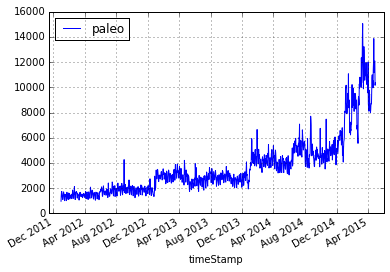

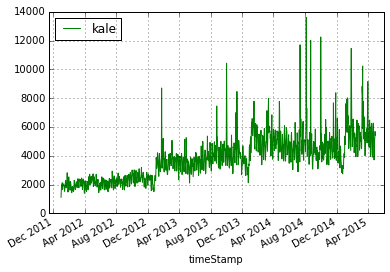

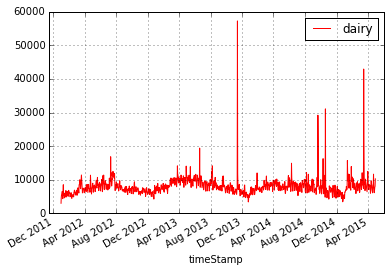

In [84]:

paleo = sampleData.plot(
    x='timeStamp'
    ,y='paleo'
    ,kind='line'
    ,xlim=['2011-11-15 00:00:00','2015-06-01 00:00:00']
    ,color='b')
paleo.legend(['paleo'], loc='best')
kale = sampleData.plot(
    x='timeStamp'
    ,y='kale'
    ,kind='line'
    ,xlim=['2011-11-15 00:00:00','2015-06-01 00:00:00']
    ,color='g')
kale.legend(['kale'], loc='best')
dairy = sampleData.plot(
    x='timeStamp'
    ,y='dairy'
    ,kind='line'
    ,xlim=['2011-11-15 00:00:00','2015-06-01 00:00:00']
    ,color='r')
dairy.legend(['dairy'], loc='best')
plt.show()

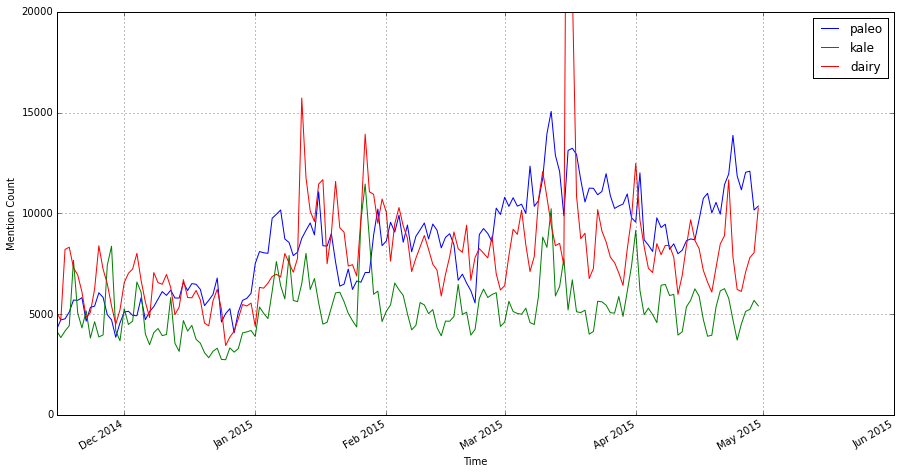

In [98]:

paleo = sampleData.plot(
    x='timeStamp'
    ,y='paleo'
    ,kind='line'
    ,xlim=['2011-11-15 00:00:00','2015-06-01 00:00:00'])
paleo.legend(['paleo'], loc='best')
kale = sampleData.plot(
    x='timeStamp'
    ,y='kale'
    ,kind='line'
    ,xlim=['2011-11-15 00:00:00','2015-06-01 00:00:00']
    ,ax = paleo)
kale.legend(['paleo','kale'], loc='best')
dairy = sampleData.plot(
    x='timeStamp'
    ,y='dairy'
    ,kind='line'
    ,xlim = ['2014-11-15 00:00:00','2015-06-01 00:00:00']
    ,ylim = [0,20000]
    ,ax=kale
    ,figsize =(15,8))
dairy.legend(['paleo','kale','dairy'], loc='best')
dairy.set_xlabel("Time")
dairy.set_ylabel("Mention Count")
plt.show()

In [ ]:
x_sum.plot(x='year', y='col_name_2', style='o')


In [10]:

sampleData['donut_sum'] = sampleData.grouby(['Year','Month'])['donut'].transform(np.sum)

AttributeError: 'DataFrame' object has no attribute 'grouby'

In [11]:
sampleData.to_csv("../data/test.csv",index=False)

In [12]:
data = [{'x': 10, 'y': 20, 'r': 15, 'name': 'circle one'}, 
        {'x': 40, 'y': 40, 'r': 5, 'name': 'circle two'},
        {'x': 20, 'y': 30, 'r': 8, 'name': 'circle three'},
        {'x': 25, 'y': 10, 'r': 10, 'name': 'circle four'}]


d3_example.plot_circle(data)

In [7]:
d3_example.plot_circle(data, id=2)